In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
from matplotlib import pyplot
import sklearn as sk

In [3]:
# importing the data to a dataframe 
df = pd.read_csv("data/heart-attack-prediction/heart.csv") 
SAMPLE_SIZE = len(df.index)

From https://www.kaggle.com/rashikrahmanpritom/heart-attack-analysis-prediction-dataset

About this dataset
Age : Age of the patient

Sex : Sex of the patient

exang: exercise induced angina (1 = yes; 0 = no)

ca: number of major vessels (0-3)

cp : Chest Pain type chest pain type

Value 1: typical angina
Value 2: atypical angina
Value 3: non-anginal pain
Value 4: asymptomatic
trtbps : resting blood pressure (in mm Hg)

chol : cholestoral in mg/dl fetched via BMI sensor

fbs : (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)

rest_ecg : resting electrocardiographic results

Value 0: normal
Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria

thalach : maximum heart rate achieved

target/output : 0= less chance of heart attack 1= more chance of heart attack



In [4]:
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
#Lets use output or target as preiction label

# Specify the data 3 skip the quality out for y
X= df.loc[:, :'thall']
y = df.loc[:,['output']]
print(X.head())
print(y.head())

   age  sex  cp  trtbps  chol  fbs  restecg  thalachh  exng  oldpeak  slp  \
0   63    1   3     145   233    1        0       150     0      2.3    0   
1   37    1   2     130   250    0        1       187     0      3.5    0   
2   41    0   1     130   204    0        0       172     0      1.4    2   
3   56    1   1     120   236    0        1       178     0      0.8    2   
4   57    0   0     120   354    0        1       163     1      0.6    2   

   caa  thall  
0    0      1  
1    0      2  
2    0      2  
3    0      2  
4    0      2  
   output
0       1
1       1
2       1
3       1
4       1


In [6]:
# Split the data up in train and test sets
X_train, X_test, y_train, y_test = train_test_split(X.to_numpy(), y.to_numpy(), test_size=0.33, random_state=42)
print("X_train.shape=", X_train.shape,"X_test=",X_test.shape,"y_train=",y_train.shape,"y_test=",y_test.shape)
print(X_train[0,])
print(X_test[0,])
unique, counts = np.unique(y_test, return_counts=True)
print(np.asarray((unique, counts)).T)


X_train.shape= (203, 13) X_test= (100, 13) y_train= (203, 1) y_test= (100, 1)
[ 54.    1.    2.  150.  232.    0.    0.  165.    0.    1.6   2.    0.
   3. ]
[ 57.    1.    0.  150.  276.    0.    0.  112.    1.    0.6   1.    1.
   1. ]
[[ 0 42]
 [ 1 58]]


In [7]:
# Scale the Feature data
scaler = sk.preprocessing.StandardScaler().fit(X_train)
X_train_s = scaler.transform(X_train)
X_test_s = scaler.transform(X_test)

In [8]:
# Convert the  validation data 
num_classes = 2
y_train_org = y_train
y_test_org = y_test
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
print("X_train.shape=", X_train.shape,"X_test=",X_test.shape,"y_train=",y_train.shape,"y_test=",y_test.shape)

X_train.shape= (203, 13) X_test= (100, 13) y_train= (203, 2) y_test= (100, 2)


In [9]:
print(y_test[1:10])
print(y_test_org[1:10])

[[1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]]
[[0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]]


Lets use a simple 3 or 4 layer Neural Network to learn

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
layer1 (Dense)               (None, 8)                 112       
_________________________________________________________________
layer2 (Dense)               (None, 12)                108       
_________________________________________________________________
layer3 (Dense)               (None, 12)                156       
_________________________________________________________________
prediction (Dense)           (None, 2)                 26        
Total params: 402
Trainable params: 402
Non-trainable params: 0
_________________________________________________________________
4/4 [==============================] - 0s 808us/step - loss: 0.5729 - accuracy: 0.7900
Test loss: 0.5729370713233948
Test accuracy: 0.7900000214576721
dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


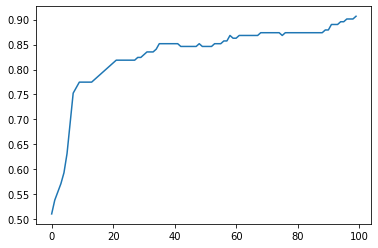

In [11]:
np.random.seed(1337)

# Define Sequential model with 3 layers
# https://keras.io/api/layers/core_layers/dense/
# Model / data parameters

input_shape = (13, )

#https://keras.io/examples/vision/mnist_convnet/

model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Dense(8, activation="relu", name="layer1"),
        layers.Dense(12, activation="relu", name="layer2"),
        layers.Dense(12, activation="relu", name="layer3"),
        layers.Dense(num_classes,  activation="softmax", name="prediction")
    ]
)

model.summary()
          
# Why ? https://ruder.io/optimizing-gradient-descent/
#using an optimizer with momemntum

#optimizer=keras.optimizers.RMSprop(),
# optimizer=keras.optimizers.SGD(learning_rate=.01)
#optimizer=tf.keras.optimizers.SGD()
optimizer = "adam"


# Why ? If features are not one hot encoded, use SparseCategoricalCrossentropy(), 
# Else use categorical_crossentropy https://stackoverflow.com/a/62286888/429476
loss="categorical_crossentropy" # use last layer activation="softmax" when using categrorical_crossentropy as op will be between (0,1)
#loss=tf.keras.losses.MeanSquaredError()

#metrics=['mse', 'mae', 'mape'])
mertics_key = "accuracy"

epochs = 100 
batch_size = 128
# epochs = 100 
# Test loss: 0.5700836181640625
# Test accuracy: 0.8100000023841858

model.compile( loss=loss, optimizer=optimizer, metrics=[mertics_key])
          
history =model.fit(X_train_s, y_train, epochs=epochs, batch_size=batch_size,verbose=0,validation_split=0.1)

score = model.evaluate(X_test_s, y_test, verbose = 1) 
print('Test loss:', score[0]) 
print('Test accuracy:', score[1])

print(history.history.keys())
#print(history.history[mertics_key])
pyplot.plot(history.history[mertics_key])
pyplot.show()

In [12]:
np.set_printoptions(precision=2)
np.set_printoptions(suppress=True)
# what we want is something like test loss, test acc: [0.14795634150505066, 0.9563999772071838]
n=1
k= X_test_s[np.newaxis,n,::]
print("X_test_s",k)
print("y_test.shape",y_test.shape)
j = y_test[n]
print("original list",j)
pred = model.predict(k)
print("original",j[1],"Prediction ",np.argmax(pred))
print("Prediction List",pred)
n=2
k= X_test_s[np.newaxis,n,::]
j = y_test[n]
pred = model.predict(k)
print("original",j[1],"Prediction ",np.argmax(pred))
print("Prediction List",pred)
n=0
k= X_test_s[np.newaxis,n,::]
j = y_test[n]
pred = model.predict(k)
print("original",j[1],"Prediction ",np.argmax(pred))
print("Prediction List",pred)


X_test_s [[ 0.48  0.72  1.91  2.3   0.72 -0.38 -1.    0.41 -0.7  -0.76 -0.66 -0.69
   1.12]]
y_test.shape (100, 2)
original list [1. 0.]
original 0.0 Prediction  1
Prediction List [[0.19 0.81]]
original 1.0 Prediction  0
Prediction List [[0.66 0.34]]
original 0.0 Prediction  0
Prediction List [[0.85 0.15]]


## https://www.sharpsightlabs.com/blog/numpy-axes-explained/#:~:text=NumPy%20axes%20are%20the%20directions,along%20the%20rows%20and%20columns.

In [32]:
k = X_test_s[np.newaxis,22,::]
print(k.shape)
print(k)

(1, 13)
